# COVID-19 Face Mask Mandate and Effectiveness

## Daniel Zhang, Dominic Beninati, Anthony He CMSC320

### Introduction
The COVID-19 Pandemic has been ongoing for nearly 2 years, with new variants arising and no end to the pandemic in sight. While many states had strong initial responses in which mandates were imposed to prevent the spread of COVID, many of these restrictions have since been lifted despite these new variants arising.

This project looks to analyze the effectiveness of the face mask mandate that has been employed and vaccination rates across states.
We want to observe whether there was a strong statistical impact of these policies, and whether states should reinstate them  based on past statistics.

To start, python libraries were imported to help us with our analysis.

In [613]:
import pandas as pd
import csv
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Collection

### What data are we using?
Sadly there was no data set that contained everything we needed. Instead, we are using 4 different tables that carry all the information we need. 

***State Policies***

Each states respective policies released regarding the pandemic and when they were released. This document was published [here](https://github.com/USCOVIDpolicy/COVID-19-US-State-Policy-Database) by USCOVIDpolicy.

***Covid Cases***

The amount of reported COVID cases from each state over a multitude of dates. This document was published [here](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36) by the CDC

***Vaccinations***

The amount of vaccinations in every state. This document was published [here](https://www.kaggle.com/bumjunkoo/us-vaccination-progress) by a user named hoyo.

***General Population***

The population of each state. This was found on a document [here](https://www.populationu.com/gen/us-states-by-population) by PopulationU, who makes reference to the US April 2020 Census. The PDF on the website was converted into a csv for easier use.

In [339]:
# table of states and policies
state_policy = pd.read_excel('COVID-19 US state policy database 12_16_2021.xlsx')
# table of covid cases per state
covid_cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
# table of covid vaccinations per state
state_vaccinations = pd.read_csv('us_state_vaccinations.csv')
# table of State population
population = pd.read_csv('State Population 2020 Census.csv')

To ensure that the data has been imported properly, we will display the information using the .head() function, which will display the top 5 rows of the data.

In [76]:
state_policy.head()

,STATE,POSTCODE,FIPS,STEMERG,STEMERGEND,STEMERG2,CLSCHOOL,CLDAYCR,OPNCLDCR,CLNURSHM,...,MINWAGEMAR2019,MINWAGEJUL2019,MINWAGEOCT2019,MINWAGEJAN2020,MINWAGEJUL2020,MINWAGESEP2020,MINWAGEOCT2020,TIPMINWAGE2020,MINWAGE2021,SMALLBUSMINWAGE
0,State,State Abbreviation,FIPS Code,State of emergency issued,State of emergency lifted,State of emergency reinstated,Date closed K-12 public schools,Closed day cares,Reopen day cares,Date banned visitors to nursing homes,...,Mar 29 2019 Minimum Wage,Jul 1 2019 Minimum Wage,Oct 1 2019 Minimum Wage,Jan 1 2020 Minimum Wage,Jul 1 2020 Minimum Wage,Sep 1 2020 Minimum Wage,Oct 1 2020 Minimum Wage,2020 Minimum Wage for Tipped Workers,2021 Minimum Wage,Different Minimum Wage for Smaller Businesses
1,category,NaN,NaN,state_of_emergency,state_of_emergency,state_of_emergency,physical_distance_closure,physical_distance_closure,Reopening,physical_distance_closure,...,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage,minimum_wage
2,type,note,note,start,end,start,start,start,end,start,...,quantity,quantity,quantity,quantity,quantity,quantity,quantity,quantity,quantity,attribute
3,unit,text,attribute,date,date,date,date,date,date,date,...,dollars,dollars,dollars,dollars,dollars,dollars,dollars,dollars,dollars,flag
4,Alabama,AL,1,2020-03-13 00:00:00,2021-07-06 00:00:00,2021-08-13 00:00:00,2020-03-20 00:00:00,2020-03-20 00:00:00,2020-05-23 00:00:00,2020-03-19 00:00:00,...,7.25,7.25,7.25,7.25,7.25,7.25,7.25,2.13,7.25,0


In [102]:
covid_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,02/12/2021,UT,359641,359641.0,0.0,1060.0,0.0,1785,1729.0,56.0,11.0,2.0,02/13/2021 02:50:08 PM,Agree,Agree
1,03/01/2021,CO,438745,411869.0,26876.0,677.0,60.0,5952,5218.0,734.0,1.0,0.0,03/01/2021 12:00:00 AM,Agree,Agree
2,08/22/2020,AR,56199,NaN,NaN,547.0,0.0,674,NaN,NaN,11.0,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
3,07/17/2020,MP,37,37.0,0.0,1.0,0.0,2,2.0,0.0,0.0,0.0,07/19/2020 12:00:00 AM,Agree,Agree
4,08/12/2020,AS,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0,0.0,08/13/2020 02:12:28 PM,NaN,NaN


In [78]:
state_vaccinations.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN


In [231]:
population.head()

,State,Abbr,Population
0,Alabama,AL,5024279
1,Alaska,AK,733391
2,Arizona,AZ,7151502
3,Arkansas,AR,3011524
4,California,CA,39538223


This data has a lot of issues with general readability, so we will clean up the data a bit. Some things that will be changed amongst all data sets will be the date/time given. Since these data points were all taken at different times, we will just treat them as a monthly point and compare them on a monthly basis.

## Fixing the state policies

To start, we will look at only a few of these policies. Our group will be looking at the effects of the Face mask mandates and date in which the general public became eligible for the COVID-19 Vaccine, and will be observing these two values.

The general readability of the table is also not the best, so we will edit modify the columns and rows. To start, we will remove the any unnecessary columns. For usability sake later, we will also create new columns that represent the day, year, and month of every policy.

In [ ]:
def removeZero(string):
    if string != 0:
        return str(string.date())
    else:
        return "0000-00-00"

In [431]:
# Create a new table with only the policies that interest us
state_policy_interest = state_policy.drop([0, 1, 2, 3, 12])

# fix the date values of when the Face Mask Mandate was imposed for everyone
state_policy_interest['date'] = [removeZero(d) for d in state_policy_interest['FM_ALL']]
state_policy_interest[["FM_ALL_year", "FM_ALL_month", "FM_ALL_day"]] = state_policy_interest["date"].str.split("-", expand = True)
state_policy_interest.drop(["date"], axis=1)

# fix the date values of when the Face Mask Mandate was ended for vaccinated people
state_policy_interest['date'] = [removeZero(d) for d in state_policy_interest['FMENDVAX']]
state_policy_interest[["FMENDVAX_year", "FMENDVAX_month", "FMENDVAX_day"]] = state_policy_interest["date"].str.split("-", expand = True)
state_policy_interest.drop(["date"], axis=1)

# fix the date values of when the Face Mask Mandate was ended for everyone
state_policy_interest['date'] = [removeZero(d) for d in state_policy_interest['FM_END']]
state_policy_interest[["FM_END_year", "FM_END_month", "FM_END_day"]] = state_policy_interest["date"].str.split("-", expand = True)
state_policy_interest.drop(["date"], axis=1)

# fix the date values of when the Face Mask Mandate was ended for everyone
state_policy_interest['date'] = [removeZero(d) for d in state_policy_interest['FM_END2']]
state_policy_interest[["FM_END2_year", "FM_END2_month", "FM_END2_day"]] = state_policy_interest["date"].str.split("-", expand = True)
state_policy_interest.drop(["date"], axis=1)

# fix the date values of when the vaccine became avaliable for the general public
state_policy_interest['date'] = [removeZero(d) for d in state_policy_interest['PUBDATE']]
state_policy_interest[["PUBDATE_year", "PUBDATE_month", "PUBDATE_day"]] = state_policy_interest["date"].str.split("-", expand = True)
state_policy_interest.drop(["date"], axis=1)

state_policy_interest = state_policy_interest[["STATE", "POSTCODE", "FMNOW", "FM_ALL", "FM_ALL_year", "FM_ALL_month", "FM_ALL_day", 
                                               "FM_END", "FMENDVAX_year", "FMENDVAX_month", "FMENDVAX_day", "FM_END_year", 
                                               "FM_END_month", "FM_END_day", "FM_END2", "FM_END2_year","FM_END2_month", 
                                               "FM_END2_day", "PUBDATE", "PUBDATE_year", "PUBDATE_month", "PUBDATE_day"]]
state_policy_interest.head()

,STATE,POSTCODE,FMNOW,FM_ALL,FM_ALL_year,FM_ALL_month,FM_ALL_day,FM_END,FMENDVAX_year,FMENDVAX_month,...,FM_END_month,FM_END_day,FM_END2,FM_END2_year,FM_END2_month,FM_END2_day,PUBDATE,PUBDATE_year,PUBDATE_month,PUBDATE_day
4,Alabama,AL,0,2020-07-16 00:00:00,2020,07,16,2021-04-09 00:00:00,2021,04,...,04,09,0,0000,00,00,2021-04-05 00:00:00,2021,04,05
5,Alaska,AK,0,2020-04-24 00:00:00,2020,04,24,2020-05-22 00:00:00,2021,05,...,05,22,0,0000,00,00,2021-03-09 00:00:00,2021,03,09
6,Arizona,AZ,0,0,0000,00,00,2021-03-25 00:00:00,2021,03,...,03,25,0,0000,00,00,2021-03-24 00:00:00,2021,03,24
7,Arkansas,AR,0,2020-07-20 00:00:00,2020,07,20,2021-03-30 00:00:00,2021,03,...,03,30,0,0000,00,00,2021-03-30 00:00:00,2021,03,30
8,California,CA,1,2020-06-18 00:00:00,2020,06,18,0,2021,06,...,00,00,0,0000,00,00,2021-04-15 00:00:00,2021,04,15


## Fixing the covid cases table

In the COVID table, minor regions of the US are included. These values will be discarded as our primary focus is the 50 states.

Similar to the State policies, we will need the date to be split up into its day month and year.

Another separate table containing the amount of cases at present will also be made for future reference purposes.

In [469]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
          'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
          'VT','VA','WA','WV','WI','WY']

covid_cases_updated = covid_cases
covid_cases_updated[["month", "day", "year"]] = covid_cases_updated["submission_date"].str.split("/", expand = True)
covid_cases_updated = covid_cases_updated.sort_values(by=['state'])

covid_cases_updated = covid_cases_updated[covid_cases_updated['state'].isin(states)]
covid_cases_updated[["month", "day", "year", "state", "tot_cases", "conf_cases", "tot_death", "conf_death"]]
covid_cases_updated.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,month,day,year
37976,07/27/2020,AK,2626,NaN,NaN,94.0,0.0,32,NaN,NaN,0.0,0.0,07/27/2020 12:00:00 AM,NaN,NaN,07,27,2020
5493,04/20/2021,AK,63794,NaN,NaN,98.0,0.0,341,NaN,NaN,0.0,0.0,04/20/2021 12:00:00 AM,NaN,NaN,04,20,2021
5500,05/12/2021,AK,66491,NaN,NaN,84.0,0.0,347,NaN,NaN,2.0,0.0,05/13/2021 02:28:07 PM,NaN,NaN,05,12,2021
34110,03/13/2020,AK,1,NaN,NaN,1.0,NaN,0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,NaN,NaN,03,13,2020
1854,08/04/2020,AK,3393,NaN,NaN,60.0,0.0,37,NaN,NaN,1.0,0.0,08/04/2020 12:00:00 AM,NaN,NaN,08,04,2020


In [473]:
covid_cases_today = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
covid_cases_today[["month", "day", "year"]] = covid_cases_today["submission_date"].str.split("/", expand = True)
covid_cases_today = covid_cases_today.loc[covid_cases_today['year'] == "2021"]
covid_cases_today = covid_cases_today.sort_values(by=['submission_date']).drop_duplicates(subset='state', keep='last')
covid_cases_today = covid_cases_today.sort_values(by=['state'])

covid_cases_today = covid_cases_today[covid_cases_today['state'].isin(states)]
covid_cases_today[["month", "day", "year", "state", "tot_cases", "conf_cases", "tot_death", "conf_death"]]
covid_cases_today.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,month,day,year
37185,12/17/2021,AK,149173,NaN,NaN,401.0,0.0,915,NaN,NaN,1.0,0.0,12/18/2021 02:58:45 PM,NaN,NaN,12,17,2021
9347,12/17/2021,AL,857292,629372.0,227920.0,690.0,177.0,16353,12688.0,3665.0,10.0,0.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021
37898,12/17/2021,AR,542426,NaN,NaN,1111.0,543.0,8930,NaN,NaN,17.0,9.0,12/18/2021 02:58:45 PM,Not agree,Not agree,12,17,2021
31324,12/17/2021,AZ,1330594,1198977.0,131617.0,3686.0,732.0,23487,20557.0,2930.0,143.0,27.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021
28606,12/17/2021,CA,5178422,4909188.0,269234.0,7293.0,0.0,74996,NaN,NaN,117.0,0.0,12/18/2021 02:58:45 PM,Agree,Not agree,12,17,2021


## Fixing the covid vaccination table
This table also included minor regions, so those points were omitted, and the date was split into day month and year

In [433]:
#Limits location to just states
state_names = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

state_vaccinations = state_vaccinations[state_vaccinations['location'].isin(state_names)]
state_vaccinations[["year", "month", "day"]] = state_vaccinations["date"].str.split("-", expand = True)
state_vaccinations[["month", "day", "year", "location", "total_vaccinations", "people_fully_vaccinated", "people_fully_vaccinated_per_hundred", "people_vaccinated", "people_vaccinated_per_hundred"]]
state_vaccinations.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,year,month,day
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,2021,01,12
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,2021,01,13
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,2021,01,14
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,2021,01,15
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,2021,01,16


# Exploratory Phase

## Bar Graph of Covid Cases in States at time of State of Emergency issue vs. Covid cases at time of end

First, we need to merge the two dataframes of covid cases and the state policies. The dataframes will be merged based on having the same state, and being in the same month and year. Since the COVID cases dataframe does not have the exact same dates as the state policies, the nearest date is found, and every other value is then dropped from the new lists.

In [569]:
# Merging the two databases
fm_end = state_policy_interest.merge(covid_cases_updated, how='inner', 
                                                  left_on=['POSTCODE', 'FM_END_year','FM_END_month'],
                                                  right_on=['state', 'year', 'month'])
# Finding the amount of cases within two days of when a State ended its State of Emergency
index = fm_end[(pd.to_numeric(fm_end['FM_END_day']) - pd.to_numeric(fm_end['day']) > 2) | 
                        (pd.to_numeric(fm_end['FM_END_day']) - pd.to_numeric(fm_end['day']) < 2)].index
# Dropping the other values
fm_end.drop(index, inplace = True)
fm_end['FMENDED?'] = True
mask_end = fm_end[['STATE', 'FM_ALL', 'FM_END', 'tot_cases', 'submission_date', 'year' , 'day', 'month']]
mask_end.rename(columns={'tot_cases' : 'tot_cases_end', 'submission_date' : 'end_date'})
mask_end.head()

,STATE,FM_ALL,FM_END,tot_cases,submission_date,year,day,month
0,Alabama,2020-07-16 00:00:00,2021-04-09 00:00:00,517220,04/07/2021,2021,07,04
43,Alaska,2020-04-24 00:00:00,2020-05-22 00:00:00,404,05/20/2020,2020,20,05
79,Arizona,0,2021-03-25 00:00:00,837869,03/23/2021,2021,23,03
112,Arkansas,2020-07-20 00:00:00,2021-03-30 00:00:00,329929,03/28/2021,2021,28,03
137,Colorado,2020-07-16 00:00:00,2021-05-15 00:00:00,535891,05/13/2021,2021,13,05


Similar to above, we are creating a database that represents when the face mask mandate was first employed.

In [570]:
# Merging the two databases
fm_start = state_policy_interest.merge(covid_cases_updated, how='inner', 
                                                  left_on=['POSTCODE', 'FM_ALL_year','FM_ALL_month'],
                                                  right_on=['state', 'year', 'month'])
# Finding the amount of cases for states where the State of Emergency was still ongoing
index = fm_start[(pd.to_numeric(fm_start['FM_ALL_day']) - pd.to_numeric(fm_start['day']) > 2) | 
                        (pd.to_numeric(fm_start['FM_ALL_day']) - pd.to_numeric(fm_start['day']) < 2)].index
# Dropping the other values
fm_start.drop(index, inplace = True)
mask_start = fm_start[['STATE', 'FM_ALL', 'tot_cases', 'submission_date', 'year' , 'day', 'month']]
mask_start.rename(columns={'tot_cases' : 'tot_cases_start', 'submission_date' : 'start_date'})
mask_start.head()

,STATE,FM_ALL,tot_cases,submission_date,year,day,month
21,Alabama,2020-07-16 00:00:00,58092,07/14/2020,2020,14,07
35,Alaska,2020-04-24 00:00:00,335,04/22/2020,2020,22,04
81,Arkansas,2020-07-20 00:00:00,32533,07/18/2020,2020,18,07
110,California,2020-06-18 00:00:00,153560,06/16/2020,2020,16,06
148,Colorado,2020-07-16 00:00:00,38341,07/14/2020,2020,14,07


We observe that not every state actually employed a face mask mandate, or ended it. Because of this, we can only observe the differences of the states where they had a face mask mandate and later ended it.

In [651]:
mask_pd = mask_start.merge(mask_end, how='right', left_on=['STATE'], right_on=['STATE'])
mask_pd['tot_cases_x'] = mask_pd['tot_cases_x'].fillna(0)
mask_pd.sort_values(by = 'STATE')
mask_pd.head()

,STATE,FM_ALL_x,tot_cases_x,submission_date_x,year_x,day_x,month_x,FM_ALL_y,FM_END,tot_cases_y,submission_date_y,year_y,day_y,month_y
0,Alabama,2020-07-16 00:00:00,58092.0,07/14/2020,2020,14,07,2020-07-16 00:00:00,2021-04-09 00:00:00,517220,04/07/2021,2021,07,04
1,Alaska,2020-04-24 00:00:00,335.0,04/22/2020,2020,22,04,2020-04-24 00:00:00,2020-05-22 00:00:00,404,05/20/2020,2020,20,05
2,Arizona,NaN,0.0,NaN,NaN,NaN,NaN,0,2021-03-25 00:00:00,837869,03/23/2021,2021,23,03
3,Arkansas,2020-07-20 00:00:00,32533.0,07/18/2020,2020,18,07,2020-07-20 00:00:00,2021-03-30 00:00:00,329929,03/28/2021,2021,28,03
4,Colorado,2020-07-16 00:00:00,38341.0,07/14/2020,2020,14,07,2020-07-16 00:00:00,2021-05-15 00:00:00,535891,05/13/2021,2021,13,05


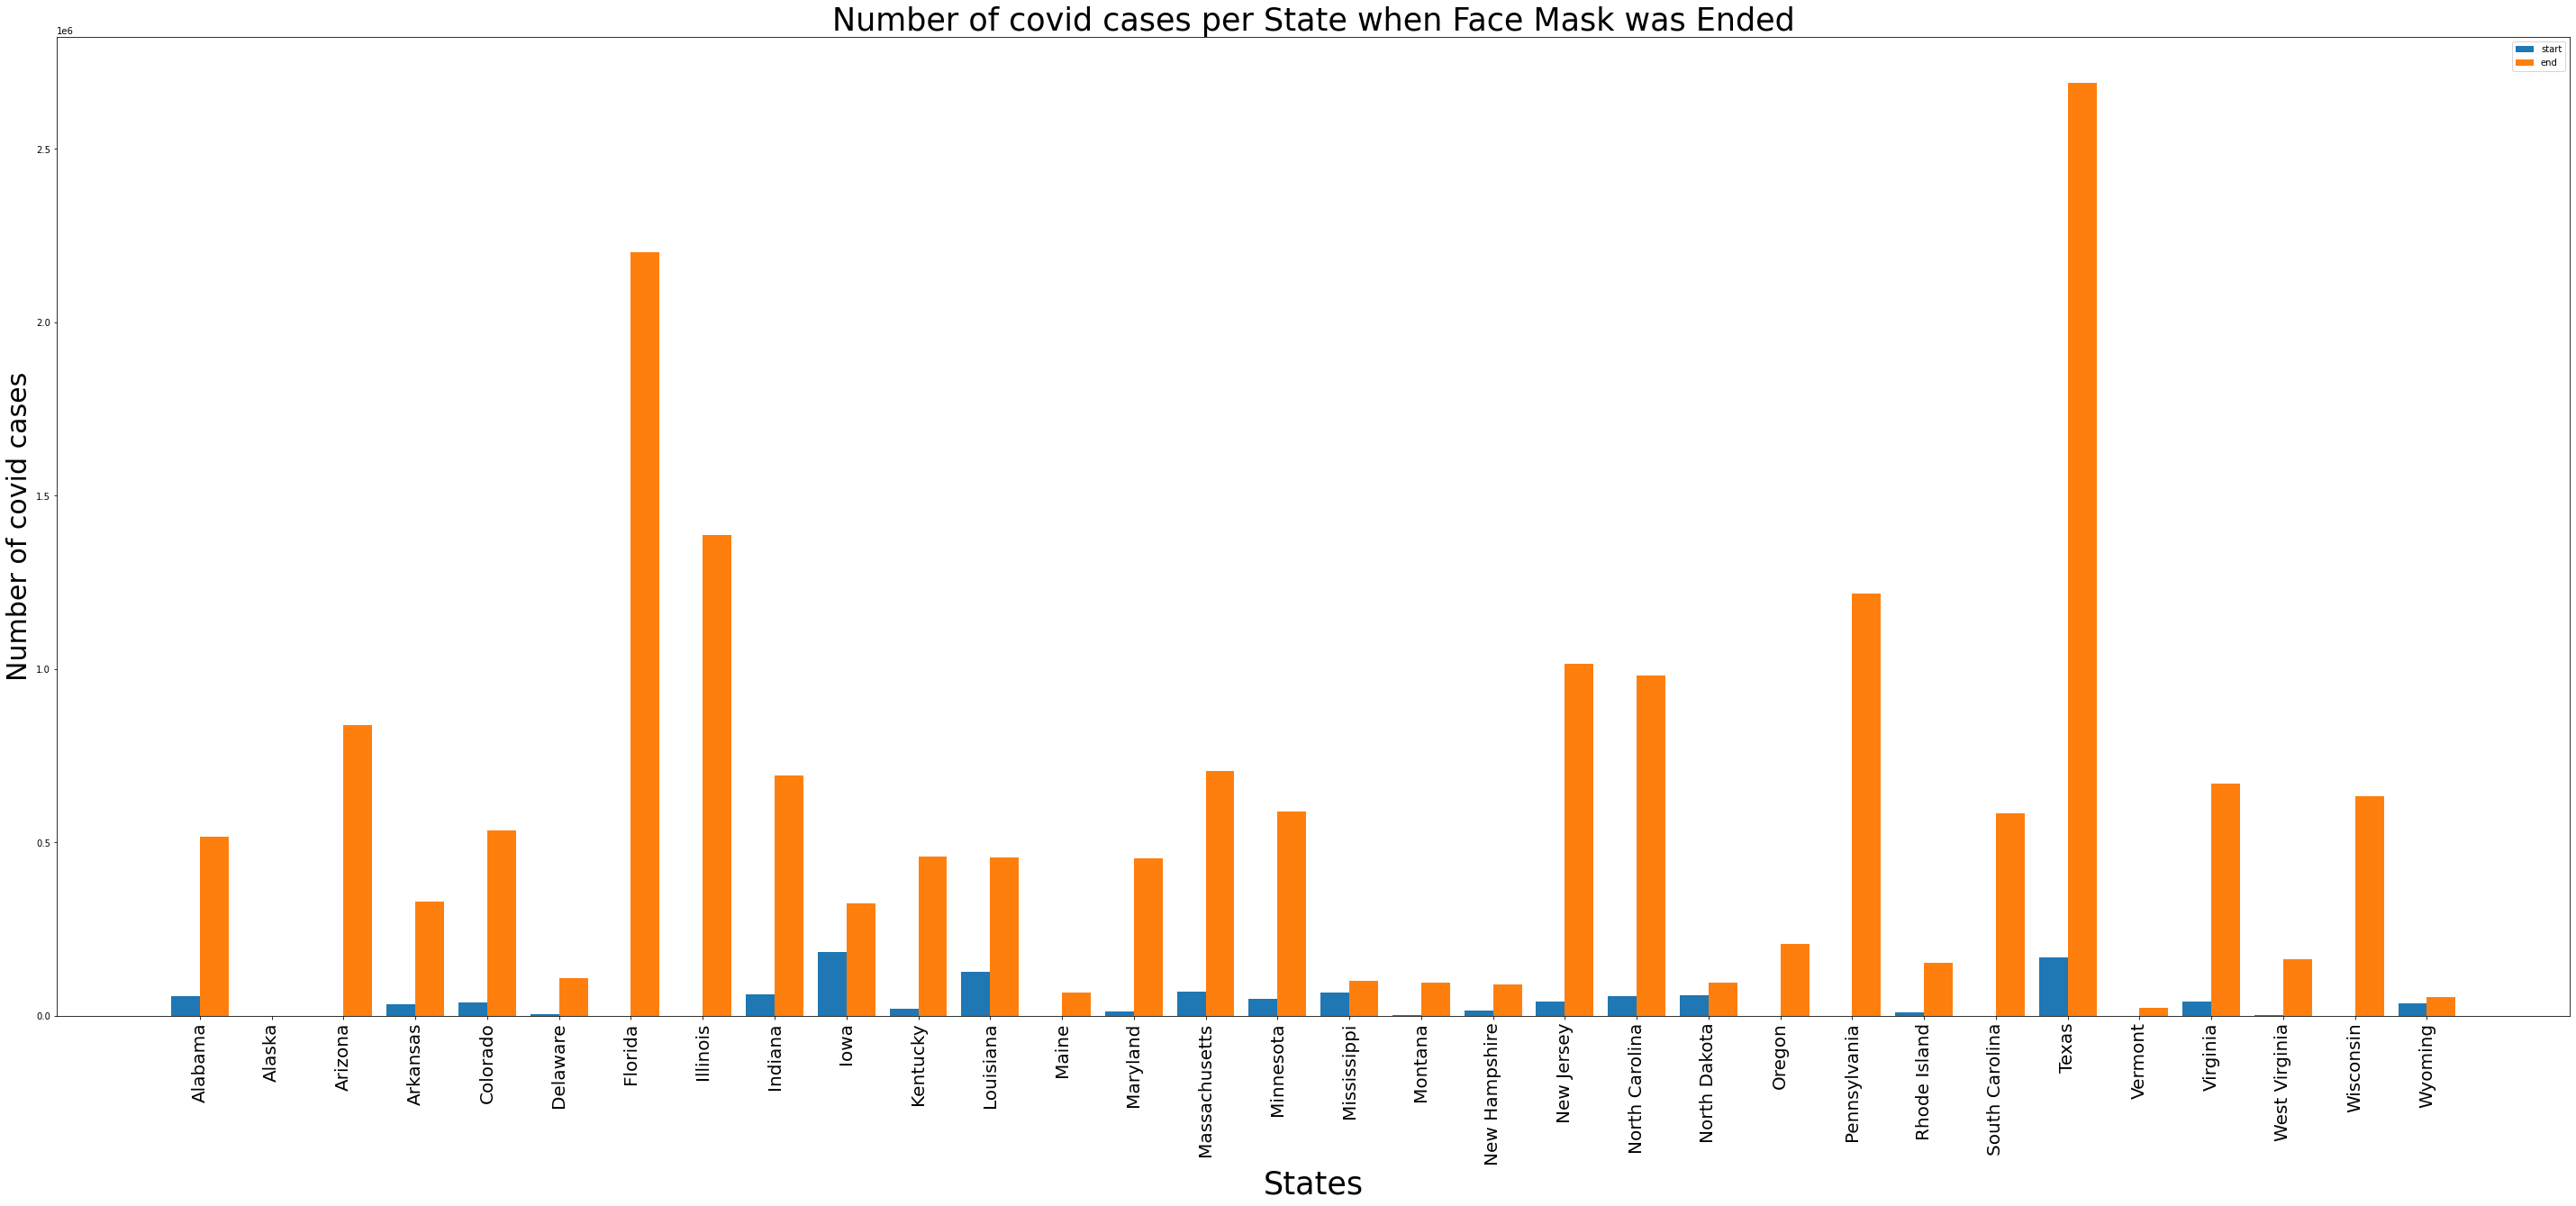

In [542]:
# change size of figures
plt.rcParams["figure.figsize"]=50,20
# make figure and axis
fig, ax = plt.subplots()

# make grouped vertical bar graph
bar_width = 0.4
labels = mask_pd['STATE']
index = np.arange(len(labels))
cases_start = mask_pd['tot_cases_x'].tolist()
cases_end = mask_pd['tot_cases_y'].tolist()

# plot values
ax.bar(index - bar_width/2, cases_start, bar_width, label = 'start')
ax.bar(index + bar_width/2, cases_end, bar_width, label = 'end')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# add title and labels
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize = 20, rotation = 'vertical')
ax.set_xlabel('States', fontsize = 35)
ax.set_ylabel('Number of covid cases', fontsize = 30)
ax.set_title('Number of covid cases per State when Face Mask was Ended', fontsize = 35)

# add legend
ax.legend()

Based on the graph, we see that the Face Mask Mandate was called very early on, when almost every state had little to no cases. We see some states called off the Face Mask Mandate with justified reason, as they had very little covid cases. Some states, such as Florida had no mandate in place and we see very large increase, whereas other states, like Texas had a mandate but still had a very large increase.

This graph however, is not very indicitave of the actual growth rate of COVID. Instead, we just see how many cases States had when they decided to call off the State of Emergency. To get a better idea, we want to also consider the population of the state as a factor, and will edit this graph to be based on percent population.

In [650]:
# creating a new table with population
mask_pop = mask_pd.merge(population, how = "left", left_on=['STATE'], right_on=['State'])
# Finding the percentage of population with covid
mask_pop['tot_cases_pop_x'] = (mask_pop['tot_cases_x'].astype(float)/mask_pop['Population'].astype(float)) *100
mask_pop['tot_cases_pop_y'] = (mask_pop['tot_cases_y'].astype(float)/mask_pop['Population'].astype(float)) *100
# Visualize the table
mask_pop.head()

,STATE,FM_ALL_x,tot_cases_x,submission_date_x,year_x,day_x,month_x,FM_ALL_y,FM_END,tot_cases_y,submission_date_y,year_y,day_y,month_y,State,Abbr,Population,tot_cases_pop_x,tot_cases_pop_y
0,Alabama,2020-07-16 00:00:00,58092.0,07/14/2020,2020,14,07,2020-07-16 00:00:00,2021-04-09 00:00:00,517220,04/07/2021,2021,07,04,Alabama,AL,5024279,1.156226,10.294412
1,Alaska,2020-04-24 00:00:00,335.0,04/22/2020,2020,22,04,2020-04-24 00:00:00,2020-05-22 00:00:00,404,05/20/2020,2020,20,05,Alaska,AK,733391,0.045678,0.055087
2,Arizona,NaN,0.0,NaN,NaN,NaN,NaN,0,2021-03-25 00:00:00,837869,03/23/2021,2021,23,03,Arizona,AZ,7151502,0.000000,11.715986
3,Arkansas,2020-07-20 00:00:00,32533.0,07/18/2020,2020,18,07,2020-07-20 00:00:00,2021-03-30 00:00:00,329929,03/28/2021,2021,28,03,Arkansas,AR,3011524,1.080284,10.955549
4,Colorado,2020-07-16 00:00:00,38341.0,07/14/2020,2020,14,07,2020-07-16 00:00:00,2021-05-15 00:00:00,535891,05/13/2021,2021,13,05,Colorado,CO,5773714,0.664061,9.281565


Now that we have editted the table to show the amount of cases based on the entire population, let's replot the graph and get a better idea of how much of each population was affected.

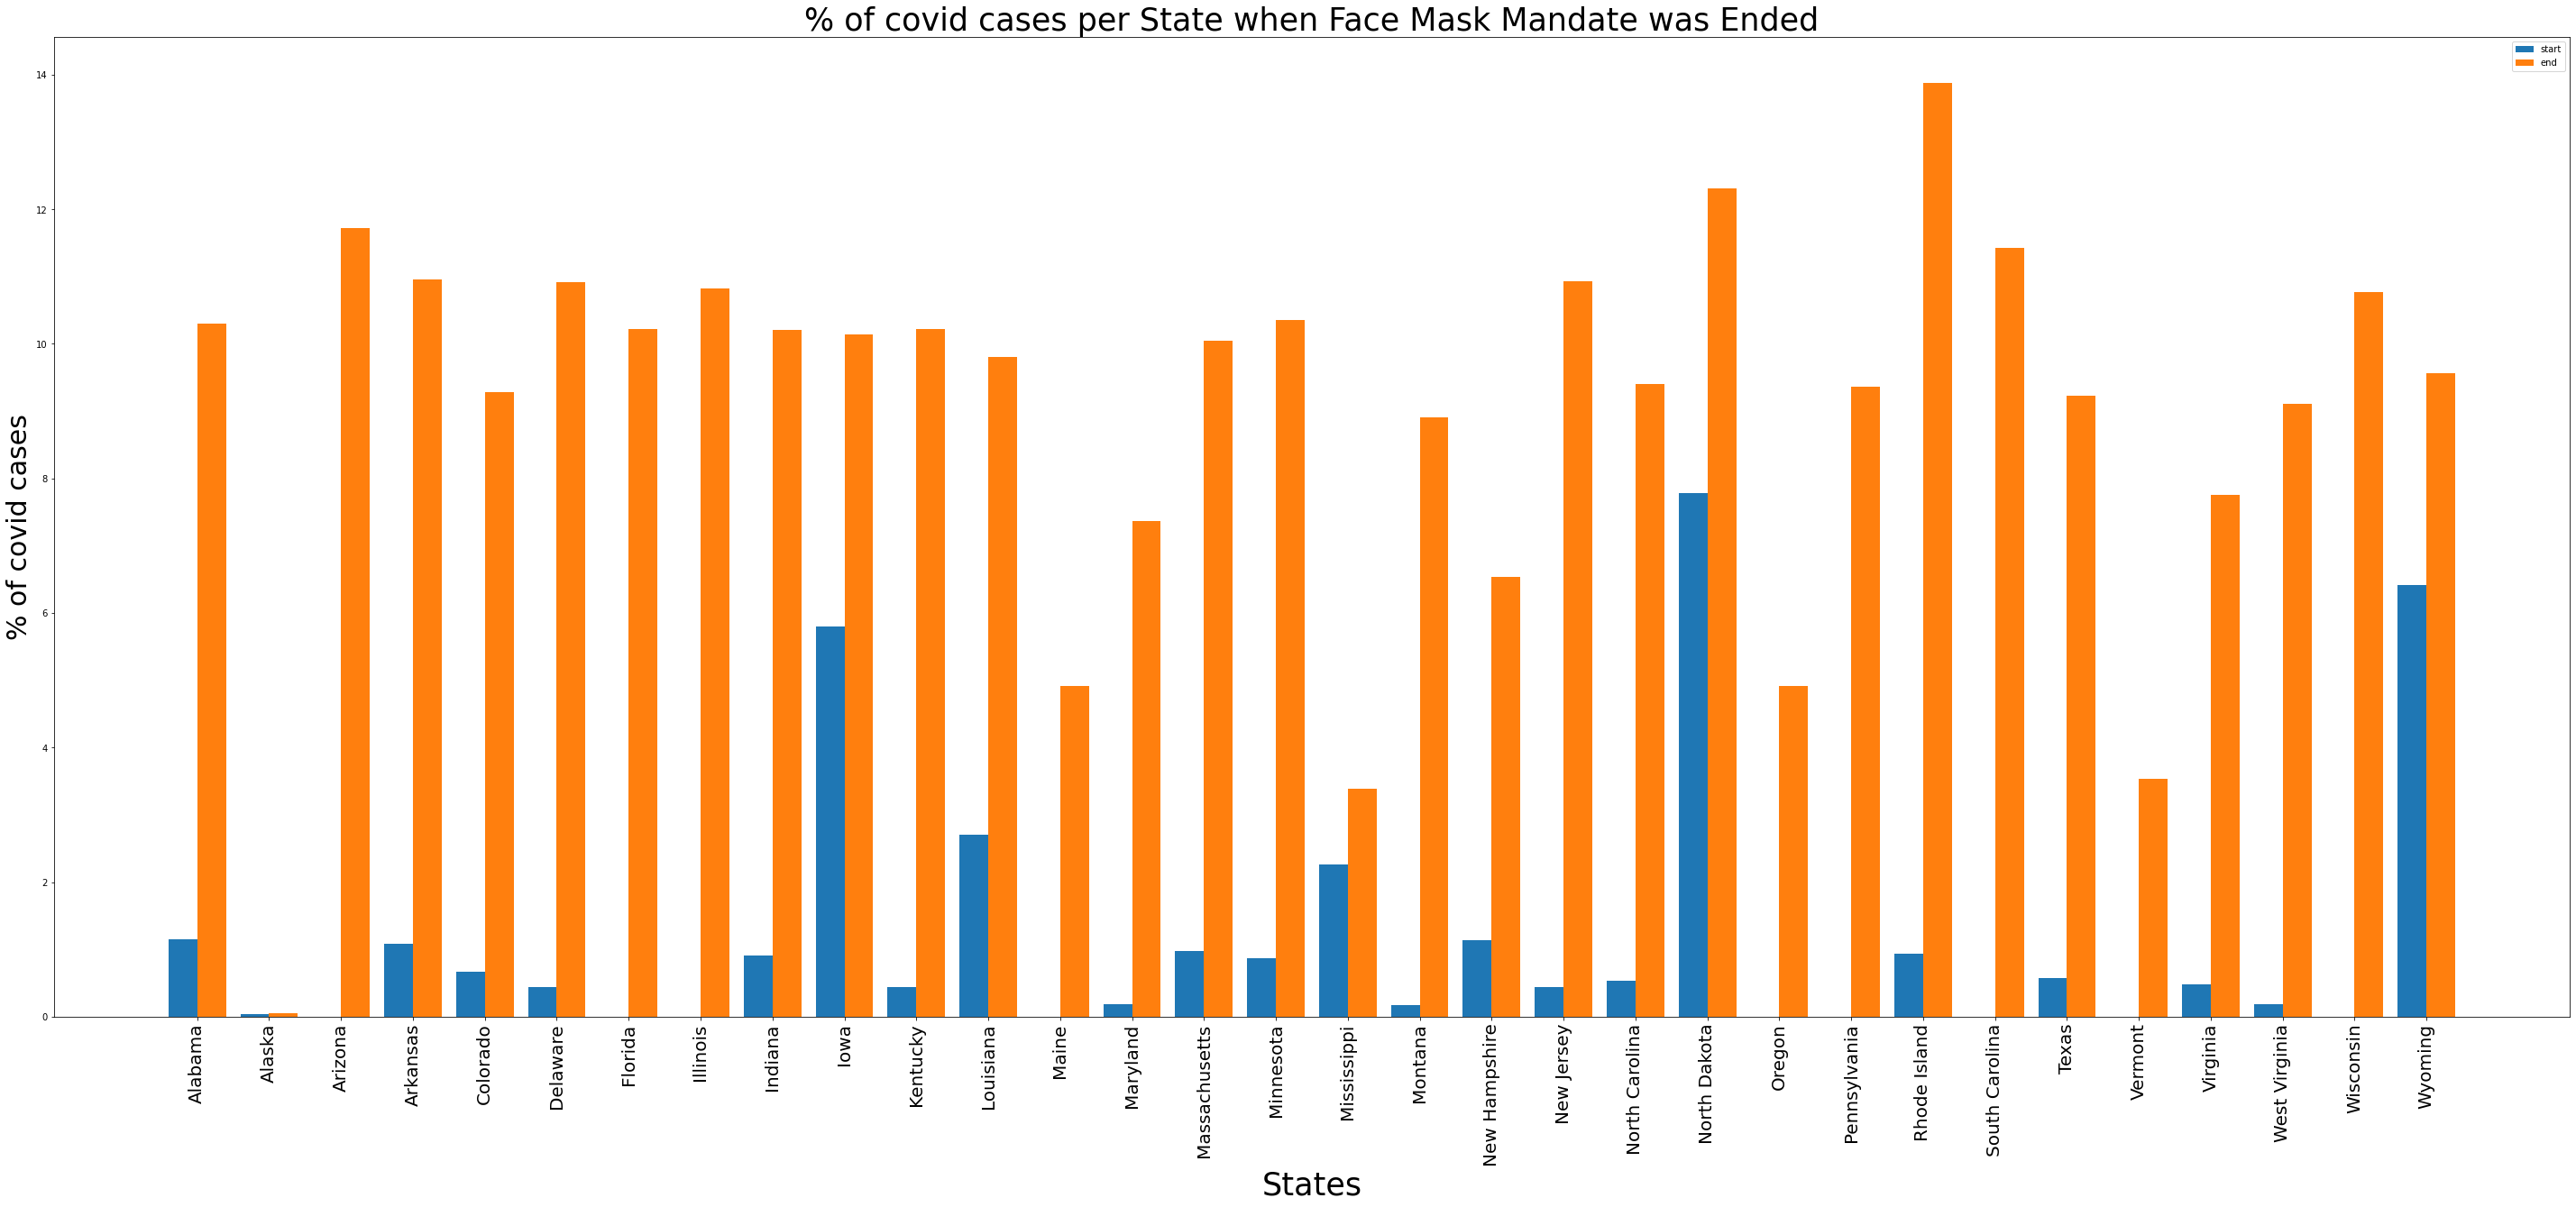

In [544]:
plt.rcParams["figure.figsize"]=50,20

fig, ax = plt.subplots()

bar_width = 0.4
labels = mask_pop['STATE']
index = np.arange(len(labels))
cases_start = mask_pop['tot_cases_pop_x'].tolist()
cases_end = mask_pop['tot_cases_pop_y'].tolist()

ax.bar(index - bar_width/2, cases_start, bar_width, label = 'start')
ax.bar(index + bar_width/2, cases_end, bar_width, label = 'end')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# add title and labels
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize = 20, rotation = 'vertical')
ax.set_xlabel('States', fontsize = 35)
ax.set_ylabel('% of covid cases', fontsize = 30)
ax.set_title('% of covid cases per State when Face Mask Mandate was Ended', fontsize = 35)

# add legend
ax.legend()

From the new graph, we see that these states had generally the same percentage of their respective populations to have tested positive for COVID, regardless of whether they had a mandate or not. Some interesting states to note: Iowa, North Dakota, and Wyoming all had relatively high percent cases when the mandate was first issued, and seemed to have relatively the same amount of increase when they all respectively ended their mandates. Another State of interest is Mississippi, which had more cases at the beginning of their mandate than most states, but had very little growth by the time they ended, leading into the question of what factors may have caused this.

To get a better idea of why the mandate was ended, we wanted to see if the decision was influenced by vaccination rates within each state, as the COVID cases were very varied amongst each state, which makes it seem like the ending of the mandate was not due to less cases.

In [649]:
# Create a table that now has vaccination rates.
vacc_perc = state_vaccinations.merge(mask_pop, how = "inner", left_on=['location', 'year' , 'day', 'month'],
                                    right_on=['STATE', 'year_y', 'day_y', 'month_y'])
# replace NaN values with 0s
vacc_perc.fillna(0)
vacc_perc.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,...,tot_cases_y,submission_date_y,year_y,day_y,month_y,State,Abbr,Population,tot_cases_pop_x,tot_cases_pop_y
0,2021-04-07,Alabama,1935221.0,3149910.0,1291487.0,15.19,39.47,744961.0,26.34,64.24,...,517220,04/07/2021,2021,07,04,Alabama,AL,5024279,1.156226,10.294412
1,2021-03-23,Arizona,2970577.0,3584605.0,1851810.0,14.56,40.81,1059558.0,25.44,49.25,...,837869,03/23/2021,2021,23,03,Arizona,AZ,7151502,0.000000,11.715986
2,2021-03-28,Arkansas,1143893.0,1662850.0,763783.0,13.37,37.90,403398.0,25.31,55.10,...,329929,03/28/2021,2021,28,03,Arkansas,AR,3011524,1.080284,10.955549
3,2021-05-13,Colorado,5015042.0,6271330.0,2847869.0,39.45,87.09,2271616.0,49.45,108.90,...,535891,05/13/2021,2021,13,05,Colorado,CO,5773714,0.664061,9.281565
4,2021-05-19,Delaware,874029.0,1142295.0,498600.0,39.81,89.76,387630.0,51.20,117.31,...,108000,05/19/2021,2021,19,05,Delaware,DE,989948,0.434467,10.909664


Text(0.5, 1.0, '% of people vaccinated and amount of cases per State when Face Mask Mandate was Ended')

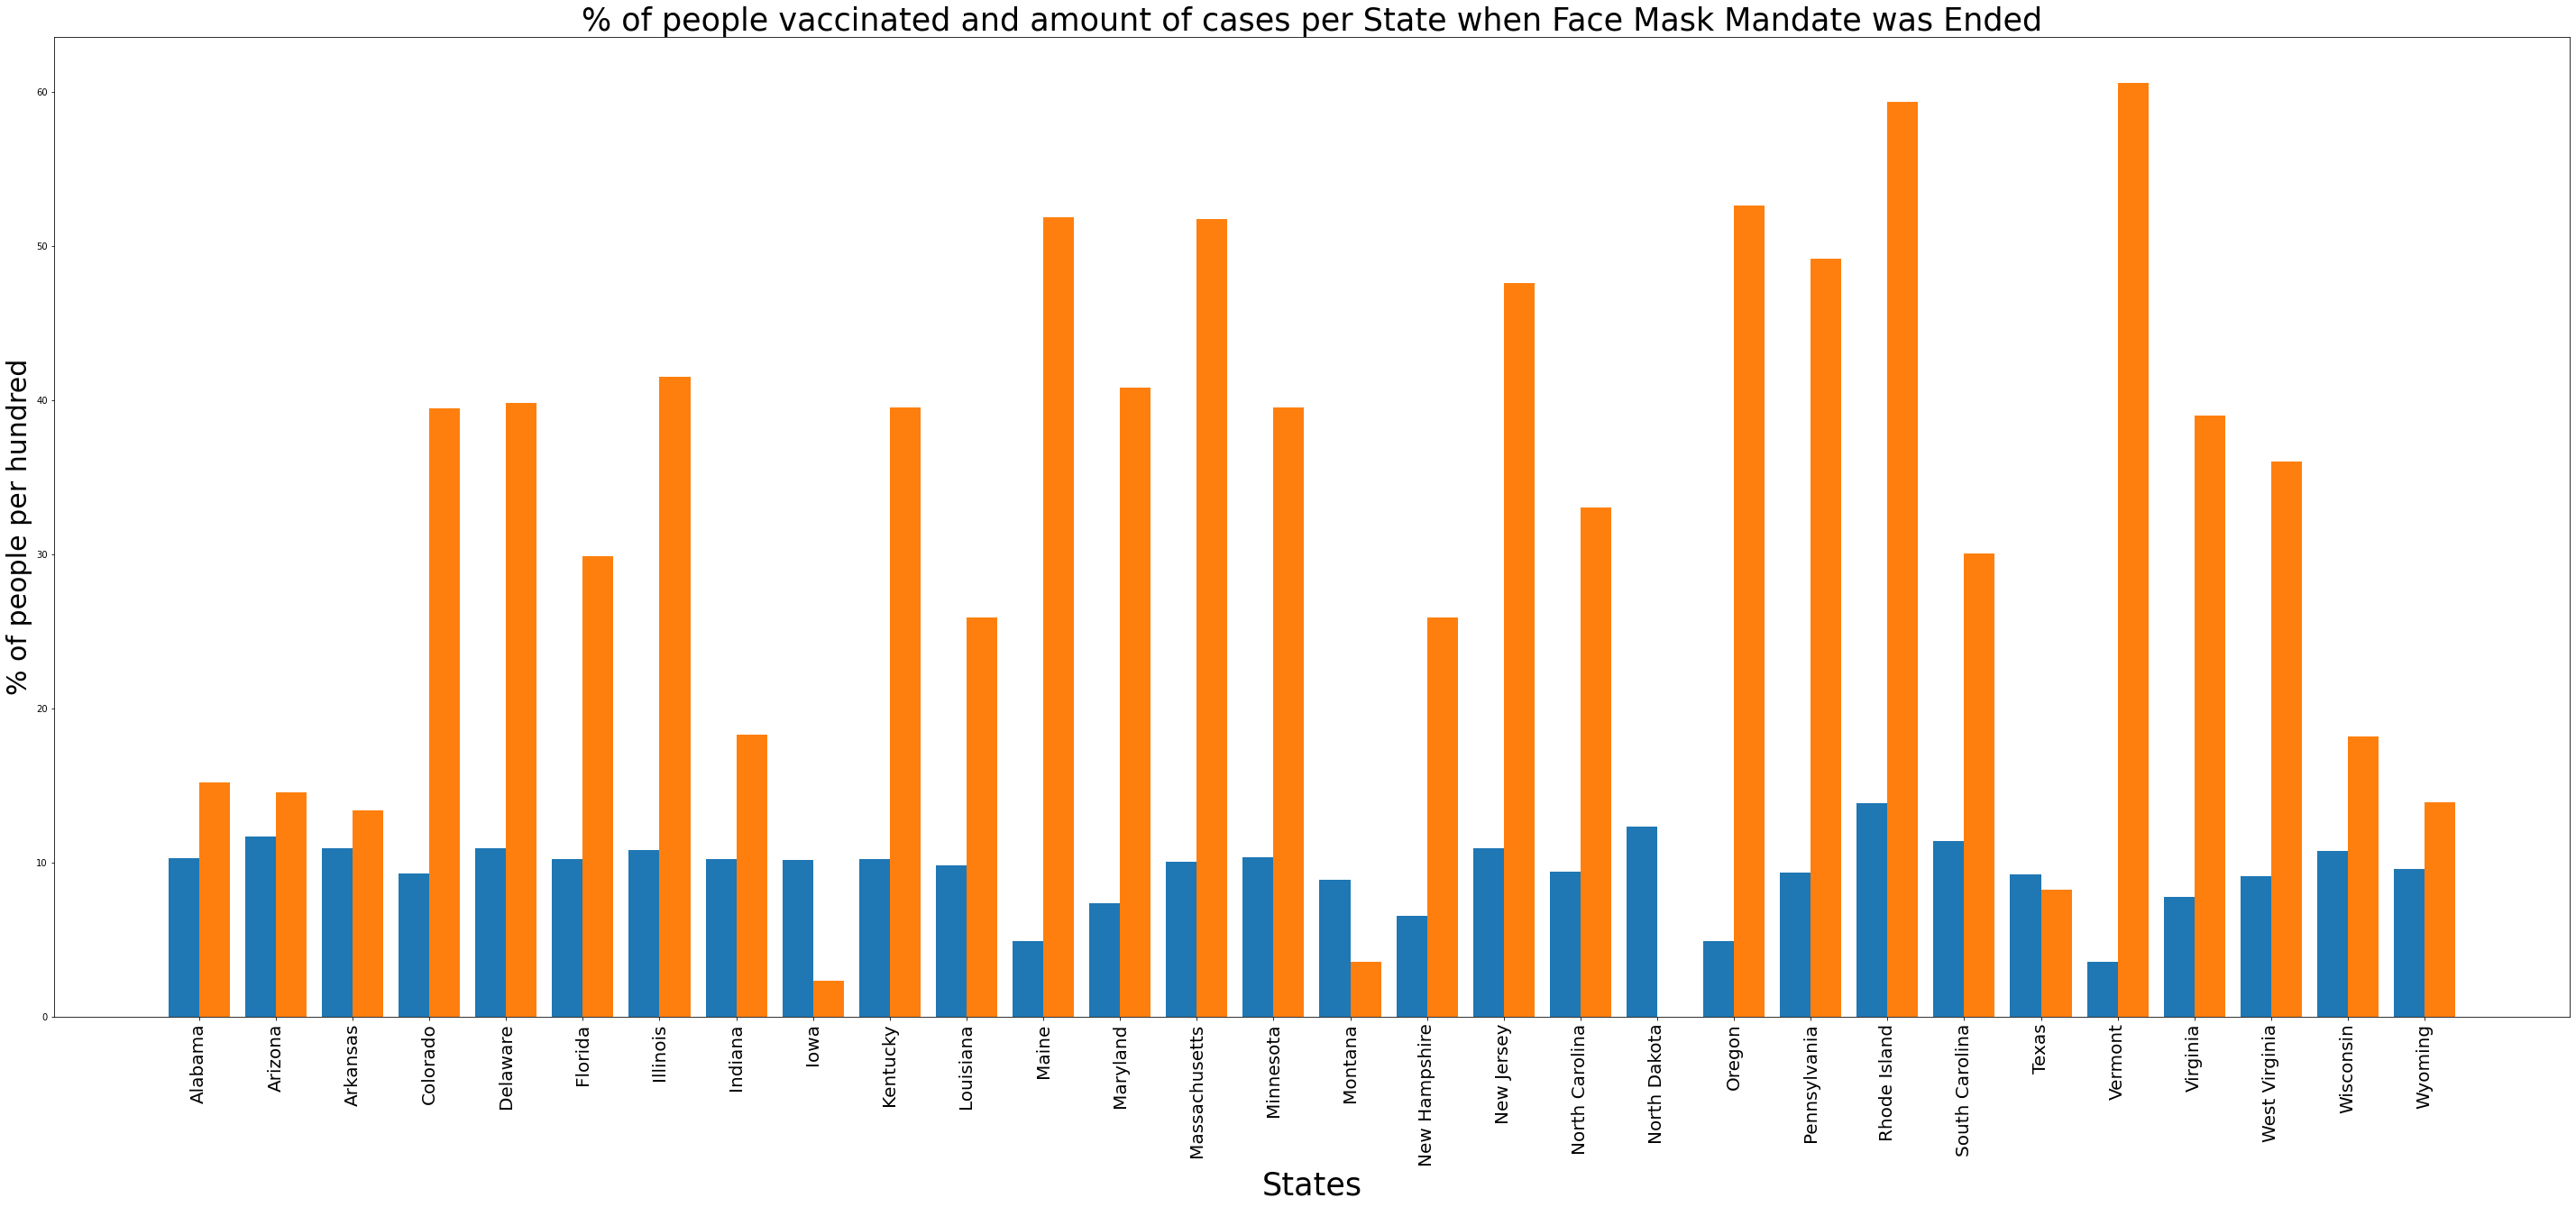

In [578]:
plt.rcParams["figure.figsize"]=50,20

fig, ax = plt.subplots()

bar_width = 0.4
labels = vacc_perc['STATE']
index = np.arange(len(labels))
cases= vacc_perc['tot_cases_pop_y'].tolist()
vacc = vacc_perc['people_fully_vaccinated_per_hundred'].tolist()
colors = {True: "red", False: "blue"}

ax.bar(index - bar_width/2, cases, bar_width, label = 'Percent of Population with Covid')
ax.bar(index + bar_width/2, vacc, bar_width, label = 'Percent of people Vaccinated')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# add title and labels
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize = 20, rotation = 'vertical')
ax.set_xlabel('States', fontsize = 35)
ax.set_ylabel('% of people per hundred', fontsize = 30)
ax.set_title('% of people vaccinated and amount of cases per State when Face Mask Mandate was Ended', fontsize = 35)

It would appear that the amount of people vaccinated per state varied heavily, and that theres no strong relationship between the idea that the mandate was ended as there seems to be a weak correlation as some states would still end the mandate depite having very low % of the population that was vaccinated.

To get a better idea of this, a heat map was created to see the correlation strength between vaccinations and cases to see if there is a correlation, and whether this was truly what states based their reasoning off of.

Now we also want to observe whether or not the vaccination has an impact on the case count today, so we will now make a table that has today's case count in it as well.

In [588]:
all_stats = vacc_perc.merge(covid_cases_today, how = "left", left_on=['Abbr'], right_on = 'state')
all_stats.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,...,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,month_y,day_y,year_y
0,2021-04-07,Alabama,1935221.0,3149910.0,1291487.0,15.19,39.47,744961.0,26.34,64.24,...,12688.0,3665.0,10.0,0.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021
1,2021-03-23,Arizona,2970577.0,3584605.0,1851810.0,14.56,40.81,1059558.0,25.44,49.25,...,20557.0,2930.0,143.0,27.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021
2,2021-03-28,Arkansas,1143893.0,1662850.0,763783.0,13.37,37.90,403398.0,25.31,55.10,...,NaN,NaN,17.0,9.0,12/18/2021 02:58:45 PM,Not agree,Not agree,12,17,2021
3,2021-05-13,Colorado,5015042.0,6271330.0,2847869.0,39.45,87.09,2271616.0,49.45,108.90,...,8741.0,1121.0,21.0,2.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021
4,2021-05-19,Delaware,874029.0,1142295.0,498600.0,39.81,89.76,387630.0,51.20,117.31,...,2046.0,188.0,3.0,0.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021


In [548]:
new_df = all_stats[['tot_cases_y', 'tot_cases_x', 'tot_cases', 'total_vaccinations']]

In [549]:
corr_mat = new_df.corr()
corr_mat

,tot_cases_y,tot_cases_x,tot_cases,total_vaccinations
tot_cases_y,1.000000,0.271288,0.994760,0.768497
tot_cases_x,0.271288,1.000000,0.282866,-0.074354
tot_cases,0.994760,0.282866,1.000000,0.735186
total_vaccinations,0.768497,-0.074354,0.735186,1.000000


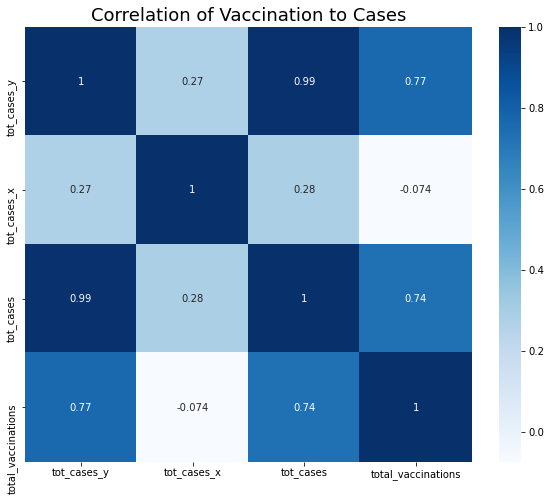

In [550]:
plt.figure(figsize = (10,8))
plt.title("Correlation of Vaccination to Cases", fontsize=18)
sns.heatmap(corr_mat, cmap = 'Blues', annot=True)
plt.show()

Based on the heat map, we see that there actually was a strong correlation between the amount of total vaccinations and the total cases when the mandate was ended, and the amount of cases we have today. We also observe that there was negative correlation between the total vaccinations and the amount of cases when the mandate was first issued, which makes sense as the vaccine had not yet been created at this time.

## Machine Learning and Predictive Modeling

Using ML, we want to see how the COVID cases for states that had a mandate in place if there were actually no mandate in place. 

In [652]:
all_stats['cases_perc_change'] = (all_stats['tot_cases_pop_y'] - all_stats['tot_cases_pop_x'])
all_stats = all_stats[all_stats['total_vaccinations'].notna()]
all_stats.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,...,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,month_y,day_y,year_y,cases_perc_change
0,2021-04-07,Alabama,1935221.0,3149910.0,1291487.0,15.19,39.47,744961.0,26.34,64.24,...,3665.0,10.0,0.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021,9.138187
1,2021-03-23,Arizona,2970577.0,3584605.0,1851810.0,14.56,40.81,1059558.0,25.44,49.25,...,2930.0,143.0,27.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021,11.715986
2,2021-03-28,Arkansas,1143893.0,1662850.0,763783.0,13.37,37.90,403398.0,25.31,55.10,...,NaN,17.0,9.0,12/18/2021 02:58:45 PM,Not agree,Not agree,12,17,2021,9.875266
3,2021-05-13,Colorado,5015042.0,6271330.0,2847869.0,39.45,87.09,2271616.0,49.45,108.90,...,1121.0,21.0,2.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021,8.617503
4,2021-05-19,Delaware,874029.0,1142295.0,498600.0,39.81,89.76,387630.0,51.20,117.31,...,188.0,3.0,0.0,12/18/2021 02:58:45 PM,Agree,Agree,12,17,2021,10.475197


We want to split the data up into states that had put a mandate into place and states that did not.

In [620]:
# Separating into two tables of based on whether a Mandate was put in place.
states_no_mandate = all_stats[all_stats['FM_ALL_x'].isna()]
states_mandate = all_stats[all_stats['FM_ALL_x'].notnull()]

states_no_mandate = states_no_mandate[['State', 'people_fully_vaccinated_per_hundred','cases_perc_change']]
states_mandate = states_mandate[['State', 'people_fully_vaccinated_per_hundred','cases_perc_change']]

states_no_mandate

,State,people_fully_vaccinated_per_hundred,cases_perc_change
1,Arizona,14.56,11.715986
5,Florida,29.86,10.220647
6,Illinois,41.52,10.819599
11,Maine,51.82,4.916399
20,Oregon,52.61,4.914076
21,Pennsylvania,49.18,9.359264
23,South Carolina,30.02,11.419802
25,Vermont,60.53,3.537679
28,Wisconsin,18.18,10.764903


In [641]:
states_mandate

,State,people_fully_vaccinated_per_hundred,cases_perc_change
0,Alabama,15.19,9.138187
2,Arkansas,13.37,9.875266
3,Colorado,39.45,8.617503
4,Delaware,39.81,10.475197
7,Indiana,18.32,9.297817
8,Iowa,2.35,4.336583
9,Kentucky,39.51,9.781248
10,Louisiana,25.92,7.095454
12,Maryland,40.80,7.182595
13,Massachusetts,51.74,9.063905


We are now performing a LinearRegression onto the States that did not implement a mandate to generate a predictive model.

In [630]:
x = states_no_mandate[['people_fully_vaccinated_per_hundred']]
y = states_no_mandate[['cases_perc_change']]
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [633]:
# get the coefficient and y-intercept given by the model
coef = reg.coef_
intercept = reg.intercept_
model = "Cases = " + str(coef[0]) + "* Vaccination"  + "+" + str(intercept)
print(model)

Cases = [-0.17255704]* Vaccination+[15.66854265]


As we can observe, the data suggests that with each increase in the percent of the population that is vaccinated, we would see a decrease in 0.17% of covid cases in that population, which is a good thing (and to be expected)

In [632]:
# split data into training/testing and intialize linear regressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# get predictions on testing data
y_pred = reg.predict(X_test)

print("Accuracy/R^2 on training data: " + str(reg.score(X_train, y_train)))
print("Accuracy/R^2 on testing data: " + str(reg.score(X_test, y_test)))

Accuracy/R^2 on training data: 0.6688498528619425
Accuracy/R^2 on testing data: 0.7685305398493367


Based on the training data, it seems that the accuracy isn't the greatest, but it is relatively accurate which is good. Since there are so much other factors that could have been included but were not explored, this makes sense. 

We will now use the predictive model on the states that did have a mandate and see what our model predicts the amount of cases would be if there were no mandate in place

In [646]:
preds = reg.predict(states_mandate[['people_fully_vaccinated_per_hundred']])
predict_mandate = states_mandate
predict_mandate['predicted_cases'] = preds
predict_mandate

,State,people_fully_vaccinated_per_hundred,cases_perc_change,predicted_cases
0,Alabama,15.19,9.138187,13.047401
2,Arkansas,13.37,9.875266,13.361455
3,Colorado,39.45,8.617503,8.861168
4,Delaware,39.81,10.475197,8.799047
7,Indiana,18.32,9.297817,12.507298
8,Iowa,2.35,4.336583,15.263034
9,Kentucky,39.51,9.781248,8.850814
10,Louisiana,25.92,7.095454,11.195864
12,Maryland,40.80,7.182595,8.628216
13,Massachusetts,51.74,9.063905,6.740442


Using the training we had performed on the states where no face mask mandate was employed on the states where there was a face mask policy employed, we observe that the predicted % of the population that would have COVID generally is greater. This shows that having a face mask mandate in place was important, as having the general mindset of making the public wear face masks decreased the spread of COVID. Since we had used vaccination rates as how we made this basis, states with very high vaccination rates had lower predicted values. This is an oversight to our method, and can be improved on by including more factors.

## Conclusion

Before doing the project, our group obviously expected that there would be a correlation in having a face mask mandate in place to having less COVID cases, however, we were unsure as to what extent it would be. Obviously, this is not the only factor, but plays a major role into the spread of COVID-19. 

In the future, to expand on this project, it would be nice to look at other policies and factors that could impact COVID rates to better improve on the model.

In general though, this project truly shows the value of having had a face mask mandate in place. By reminding the public to wear masks in public, we can really prevent the spread of COVID, and in light of the new COVID Omicron variant, it would be a wise course of action to reinstate these policies to remind the community to wear masks again for the safety of everyone.

## Future Studies

To list out future studies that could better be performed:
- How does population density impact COVID spread
- How does socioeconomic class impact COVID spread

# Resources

To get a better understanding of the code, the documentation of the libraries used are below:

- [Pandas](https://pandas.pydata.org/)
- [NumPy](https://numpy.org/)
- [MatplotLib](https://matplotlib.org/)
- [SciKit Learn](https://scikit-learn.org/stable/)
- [CSV](https://docs.python.org/3/library/csv.html)
- [DateTime](https://docs.python.org/3/library/datetime.html)
- [Seaborn](https://seaborn.pydata.org/)